<a href="https://colab.research.google.com/github/hinsley/colabs/blob/master/Cost_Effective_Dietary_Protein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is much more interactive in Google Colaboratory. Click the badge above!

# Setup

In [0]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Kidney beans: an inexpensive source of dietary protein?

Recently, I learned that Wal-Mart is selling canned light red kidney beans for $0.58 per can. That amounts to **\$1 USD** before sales tax **for approximately 49 grams of protein.**

This is a strong competitor to vital wheat gluten, which I was able to source from [Anthony's Goods](https://web.archive.org/web/20200416144016/https://www.anthonysgoods.com/products/anthonys-vital-wheat-gluten-77-protein?variant=1501185859) for **77g/USD** (grams of dietary protein per US dollar), and it just edges out [Hoosier Hill Farm's Textured Vegetable Protein (soy-based)](https://web.archive.org/web/20190804071250/https://hoosierhillfarm.com/Hoosier-Hill-Farm-Textured-Vegetable-Protein-TVP-2-lb.html), which comes in at **41g/USD**. At the time of this writing, neither of these products are in stock from these brands at any online shop, and all competitor offerings are significantly more costly. There are also concerns about vital wheat gluten irritating symptoms of those affected by celiac disease and non-celiac gluten sensitivity, and soy allergies present a problem for those affected. Additionally, light red kidney beans from Wal-Mart's generic brand Great Value offer a macronutrient ratio of **0% fat, 75% carbohydrate, and 25% protein**. This proportion of carbohydrates to protein is similar to that of a healthy adult's daily diet, and is low enough that it is viable as a staple food for athletes (particularly, for the purposes of this article, for bodybuilders -- though the focus on this demographic introduces additional subtle concerns). For these reasons, kidney beans appear at first glance to offer an ideal universal solution for plant-based dietary protein.

## The trouble with kidney beans: too little methionine

Despite the apparently excellent protein-cost ratio of kidney beans, you shouldn't rely solely on them for your dietary protein intake. **Kidney beans, like all other legumes, contain a disproportionately small amount of methionine**, an essential amino acid. Because the human body is incapable of synthesizing essential amino acids in large quantities, it is crucial that one eats them in a certain proportion (why maintaining that proportion is preferred over simply hitting a minimum daily quota for intake is beyond the scope of this article). This disproportion makes kidney beans an *incomplete protein source*.

There is evidence to suggest that [dietary methionine intake has a profound impact on muscular hypertrophy in animals](https://www.researchgate.net/publication/320636565_Effect_of_Dietary_Methionine_Level_on_Muscle_Growth_Mechanisms_in_Juvenile_Rainbow_Trout_Oncorhynchus_Mykiss) and, assuming similar results in humans, a likely causative relationship with athletic performance as a result.

But just *how much* methionine is missing from kidney beans compared to other protein sources?

According to [MyFoodData](https://tools.myfooddata.com/protein-calculator.php?foods=173740&serv=100g&qty=1), a 100 gram portion of kidney beans as well as a few common protein sources (citations in code) contains the following conditionally essential amino acids (each in milligrams):

### Amino acids in common primary protein sources (%)

In [0]:
#@title Data sourcing
amino_acids_mg_per_hg = pd.DataFrame({
  "Kidney beans": {
      "Methionine": 113,
      "Arginine": 475,
      # "Tryptophan": 104,
      "Threonine": 319,
      "Isoleucine": 410,
      "Leucine": 736,
      "Lysine": 607,
      "Cysteine": 81,
      "Phenylalanine": 511,
      "Tyrosine": 205,
      "Valine": 500,
      "Histidine": 238,
      "Glycine": 351,
      # "Proline": 496,
  },

  "Chicken breast": {
      "Methionine": 834,
      "Arginine": 2168,
      # "Tryptophan": 404,
      "Threonine": 1438,
      "Isoleucine": 1573,
      "Leucine": 2652,
      "Lysine": 3083,
      "Cysteine": 336,
      "Phenylalanine": 1294,
      "Tyrosine": 1155,
      "Valine": 1660,
      "Histidine": 1195,
      "Glycine": 1419,
      # "Proline": 1019,
  },

  "Ground beef": {
      "Methionine": 662,
      "Arginine": 1675,
      # "Tryptophan": 131,
      "Threonine": 996,
      "Isoleucine": 1138,
      "Leucine": 2007,
      "Lysine": 2131,
      "Cysteine": 265,
      "Phenylalanine": 1004,
      "Tyrosine": 792,
      "Valine": 1264,
      "Histidine": 836,
      "Glycine": 1747,
      # "Proline": 1311,
  },

  "Egg whites": {
      "Methionine": 399,
      "Arginine": 214,
      # "Tryptophan": 41,
      "Threonine": 148,
      "Isoleucine": 218,
      "Leucine": 335,
      "Lysine": 806,
      "Cysteine": 287,
      "Phenylalanine": 686,
      "Tyrosine": 457,
      "Valine": 809,
      "Histidine": 290,
      "Glycine": 413,
      # "Proline": 435,
  },

  "Pea protein shake": {
      "Methionine": 546,
      "Arginine": 4323,
      # "Tryptophan": 497,
      "Threonine": 1938,
      "Isoleucine": 2236,
      "Leucine": 4174,
      "Lysine": 3577,
      "Cysteine": 497,
      "Phenylalanine": 2733,
      "Tyrosine": 1887,
      "Valine": 2485,
      "Histidine": 1244,
      "Glycine": 2038,
      # "Proline": 2236,
  },

  "Tilapia": {
      "Methionine": 766,
      "Arginine": 1590,
      # "Tryptophan": 265,
      "Threonine": 1156,
      "Isoleucine": 1220,
      "Leucine": 2040,
      "Lysine": 2315,
      "Cysteine": 265,
      "Phenylalanine": 1050,
      "Tyrosine": 870,
      "Valine": 1280,
      "Histidine": 585,
      "Glycine": 1220,
      # "Proline": 953,
  },

  # https://www.sciencedirect.com/science/article/pii/S0022030298756504
  # Article lists concentrations in g/kg, mg/hg used here (10x).
  # WPC: Whey protein concentrate.
  "Whey (WPC)": {
      "Methionine": 218,
      "Arginine": 238,
      "Cysteine": 204,
      "Glycine": 170,
      "Histidine": 172,
      "Isoleucine": 522,
      "Leucine": 882,
      "Lysine": 728,
      "Phenylalanine": 295,
      # "Proline": None,
      "Threonine": 579,
      # "Tryptophan": None,
      "Tyrosine": 269,
      "Valine": 491,
  },

  # https://www.sciencedirect.com/science/article/pii/S0022030298756504
  # Article lists concentrations in g/kg, mg/hg used here (10x).
  "Lactic casein": {
      "Methionine": 285,
      "Arginine": 390,
      "Cysteine": 37,
      "Glycine": 209,
      "Histidine": 329,
      "Isoleucine": 496,
      "Leucine": 918,
      "Lysine": 826,
      "Phenylalanine": 531,
      # "Proline": None,
      "Threonine": 389,
      # "Tryptophan": None,
      "Tyrosine": 580,
      "Valine": 612,
  },
})

In [33]:
#@title Normalization
protein_sources = [source for source in amino_acids_mg_per_hg]

amino_acid_profile = pd.DataFrame()
amino_acid_profile[protein_sources] = amino_acids_mg_per_hg[protein_sources].div(amino_acids_mg_per_hg[protein_sources].sum(axis=0), axis=1).multiply(100).round(decimals=2)

amino_acid_profile

,Kidney beans,Chicken breast,Ground beef,Egg whites,Pea protein shake,Tilapia,Whey (WPC),Lactic casein
Methionine,2.49,4.43,4.56,7.88,1.97,5.34,4.57,5.09
Arginine,10.45,11.53,11.54,4.23,15.62,11.07,4.99,6.96
Threonine,7.02,7.65,6.86,2.92,7.00,8.05,12.14,6.94
Isoleucine,9.02,8.36,7.84,4.31,8.08,8.50,10.95,8.85
Leucine,16.19,14.10,13.83,6.62,15.08,14.21,18.50,16.39
Lysine,13.35,16.39,14.68,15.92,12.92,16.12,15.27,14.74
Cysteine,1.78,1.79,1.83,5.67,1.80,1.85,4.28,0.66
Phenylalanine,11.24,6.88,6.92,13.55,9.87,7.31,6.19,9.48
Tyrosine,4.51,6.14,5.46,9.03,6.82,6.06,5.64,10.35
Valine,11.00,8.83,8.71,15.98,8.98,8.92,10.30,10.92


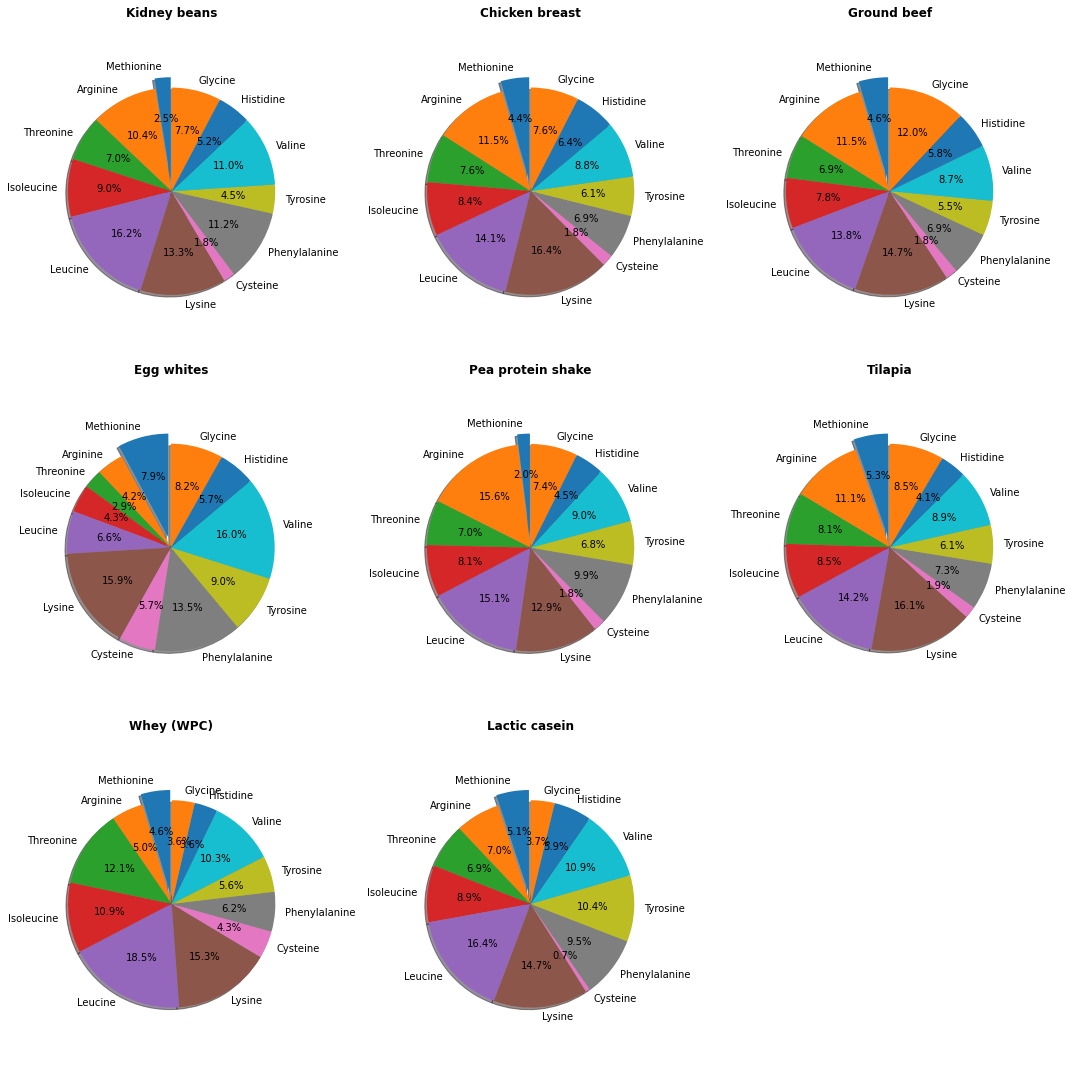

In [34]:
#@title Amino acid profiles of common primary protein sources
scaling = 5, 5

cols = 3
rows = math.ceil(len(protein_sources)/cols)

fig, axs = plt.subplots(
  nrows=rows,
  ncols=cols,
  figsize=(cols * scaling[0], rows * scaling[1]),
  facecolor="white",
)

for row in axs:
  for ax in row:
    ax.set_visible(False)

for i, source in enumerate(protein_sources):
  current_ax = axs[i//cols][i%cols]

  current_ax.set_visible(True)

  current_ax.set_title(source, fontweight="bold")

  data = amino_acid_profile[source]
  
  labels=amino_acid_profile.index

  explode = [0.1 if
             amino_acid == "Methionine" else
             0 for
             amino_acid in
             amino_acid_profile.index]

  current_ax.pie(
      data,
      labels=labels,
      explode=explode,
      shadow=True,
      startangle=90,
      autopct="%1.1f%%",
  )
  
  current_ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.

fig.tight_layout()
plt.show()

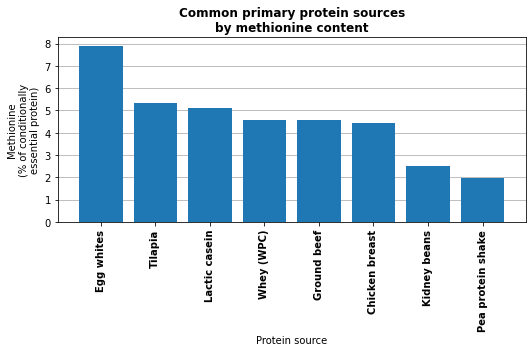

In [35]:
#@title
methionine_rank = amino_acid_profile.loc["Methionine"].sort_values(ascending=False)

scaling = 7.5, 5

fig, ax = plt.subplots(
    figsize=scaling,
    facecolor="white",
)

ax.set_title(
    "Common primary protein sources\nby methionine content",
    fontweight="bold",
)

ax.set_xlabel("Protein source")
plt.xticks(rotation=90, fontweight="bold")

ax.set_ylabel("Methionine\n(% of conditionally\nessential protein)")


ax.bar(methionine_rank.index, methionine_rank.values)

ax.set_axisbelow(True)
ax.grid(axis="y")

fig.tight_layout()
plt.show()

In [16]:
#@title Average methionine content of meats

print(f"{amino_acid_profile.loc['Methionine'].loc[['Tilapia', 'Ground beef', 'Chicken breast']].mean():.2f}%")

4.78%


Compared to meats, kidney beans come in fairly low at 2.49%. That's around 52% of the methionine content of meats. Out of interest in mimicking the biological features of these meats, we'll try to match this concentration.

## Two promising solutions

There are two solutions to the methionine dilemma:

1. Consume complimentary protein sources alongside kidney beans, or
2. Supplement methionine directly (https://www.bodybuilding.com/store/now/meth.html).
